In [1]:
from sqlalchemy import create_engine, text
import pandas as pd

# Connenting to database
user = 'postgres'
password = '12345678'
host = 'localhost'
port = '5432'
database = 'project2'

engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

In [2]:
# Reading SQL files
with open(r'C:\Users\Lioha\Desktop\project2\01_01_category_sales_analysis.sql') as file:
    q_1_1_category_sales = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\01_02_monthly_sales_analysis.sql') as file:
    q_1_2_monthly_sales = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\02_01_profit_and_loss_by_category.sql') as file:
    q_2_1_profit_category = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\02_02_profit_and_loss_by_month.sql') as file:
    q_2_2_profit_month = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\03_01_discount_analysis_by_category.sql') as file:
    q_3_1_discount_category = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\03_02_discount_analysis_by_month.sql') as file:
    q_3_2_discount_month = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\04_01_top_bottom_by_category.sql') as file:
    q_4_1_top_bottom = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\04_02_top_returns_by_category.sql') as file:
    q_4_2_top_returns = file.read()

with open(r'C:\Users\Lioha\Desktop\project2\04_03_longtail_and_losses.sql') as file:
    q_4_3_longtail_losses = file.read()

In [3]:
# Data reading using .connect()
with engine.connect() as conn:
    df_1_1_category_sales = pd.read_sql(text(q_1_1_category_sales), conn)
    df_1_2_monthly_sales = pd.read_sql(text(q_1_2_monthly_sales), conn)
    df_2_1_profit_category = pd.read_sql(text(q_2_1_profit_category), conn)
    df_2_2_profit_month = pd.read_sql(text(q_2_2_profit_month), conn)
    df_3_1_discount_category = pd.read_sql(text(q_3_1_discount_category), conn)
    df_3_2_discount_month = pd.read_sql(text(q_3_2_discount_month), conn)
    df_4_1_top_bottom = pd.read_sql(text(q_4_1_top_bottom), conn)
    df_4_2_top_returns = pd.read_sql(text(q_4_2_top_returns), conn)
    df_4_3_longtail_losses = pd.read_sql(text(q_4_3_longtail_losses), conn)

In [4]:
df_1_1_category_sales.head(2)

,year,category,sales_kg,sales_records,returns_records,discount_percent,avg_selling_price,revenue
0,2023,Flower/Leaf Vegetables,33430.50,45234,26,8.73%,5.12,171324.51
1,2023,Capsicum,21493.84,33970,14,6.12%,6.76,145266.43


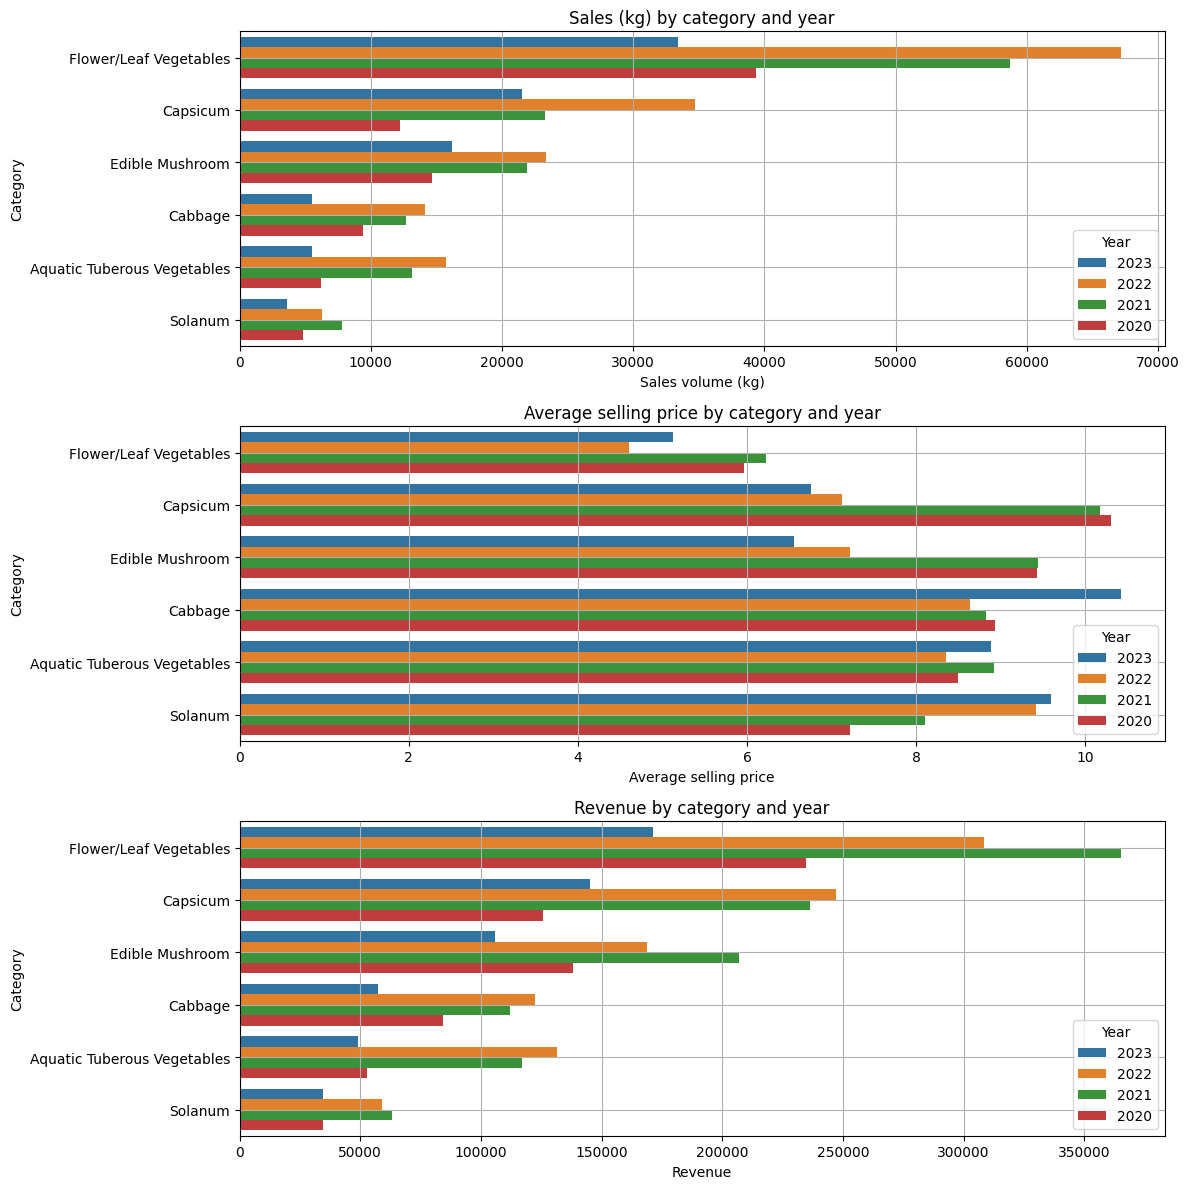

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales (kg) by category and year

plt.figure(figsize=(12,12))
plt.subplot(3, 1, 1)
sns.barplot(data=df_1_1_category_sales, x='sales_kg', y='category', hue='year')
plt.title('Sales (kg) by category and year')
plt.xlabel('Sales volume (kg)')
plt.ylabel('Category')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# 2. Average selling price by category and year
plt.subplot(3, 1, 2)
sns.barplot(data=df_1_1_category_sales, x='avg_selling_price', y='category', hue='year')
plt.title('Average selling price by category and year')
plt.xlabel('Average selling price')
plt.ylabel('Category')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# 3. Revenue by category and year
plt.subplot(3, 1, 3)
sns.barplot(data=df_1_1_category_sales, x='revenue', y='category', hue='year')
plt.title('Revenue by category and year')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
df_1_2_monthly_sales.head(1)

,month,sales_kg,sales_records,returns_records,discount_percent,avg_selling_price,revenue
0,2023-06,10908.41,17823,1,8.26%,6.43,70103.42


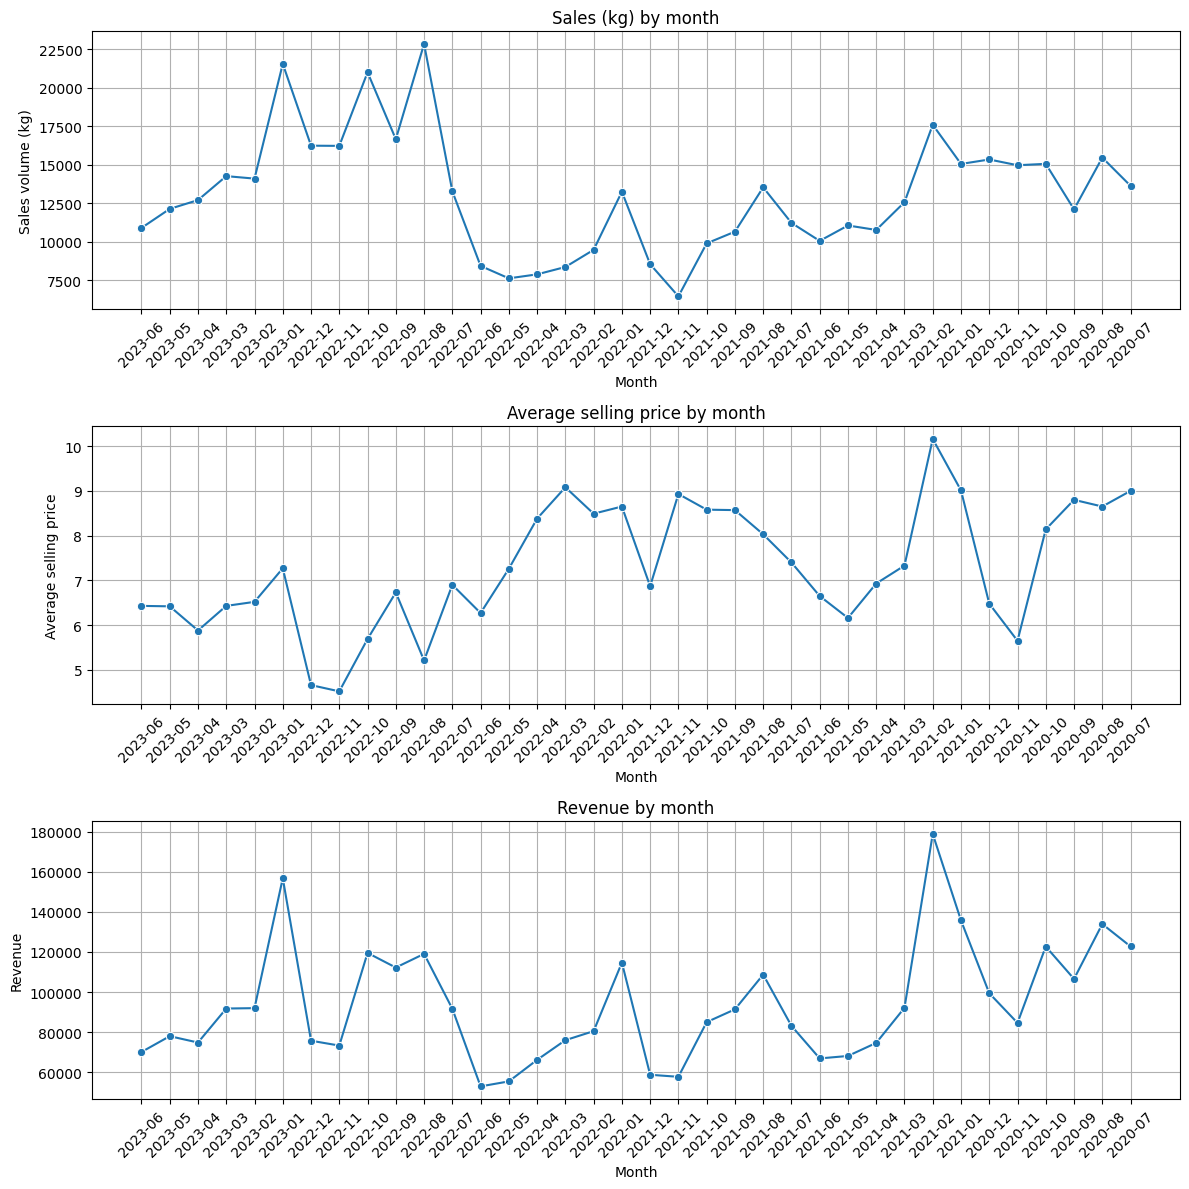

In [7]:
# 1. Sales (kg) by month

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
sns.lineplot(data=df_1_2_monthly_sales, x='month', y='sales_kg', marker='o')
plt.title('Sales (kg) by month')
plt.xlabel('Month')
plt.ylabel('Sales volume (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 2. Average selling price by month
plt.subplot(3, 1, 2)
sns.lineplot(data=df_1_2_monthly_sales, x='month', y='avg_selling_price', marker='o')
plt.title('Average selling price by month')
plt.xlabel('Month')
plt.ylabel('Average selling price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 3. revenue by month
plt.subplot(3, 1, 3)
sns.lineplot(data=df_1_2_monthly_sales, x='month', y='revenue', marker='o')
plt.title('Revenue by month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
 df_2_1_profit_category.head(1)

,year,category,revenue,profit,margin_percent,loss_returns,loss_spoilage,real_profit
0,2023,Flower/Leaf Vegetables,171324.51,63414.22,37.01%,45.03,10835.46,52533.73


In [9]:
# Total losses as loss returns + loss spoilage
df_2_1_profit_category['loss_total'] = (df_2_1_profit_category['loss_returns'] + df_2_1_profit_category['loss_spoilage'])
df_2_1_profit_category['margin_percent'] = df_2_1_profit_category['margin_percent'].str.rstrip('%').astype(float)

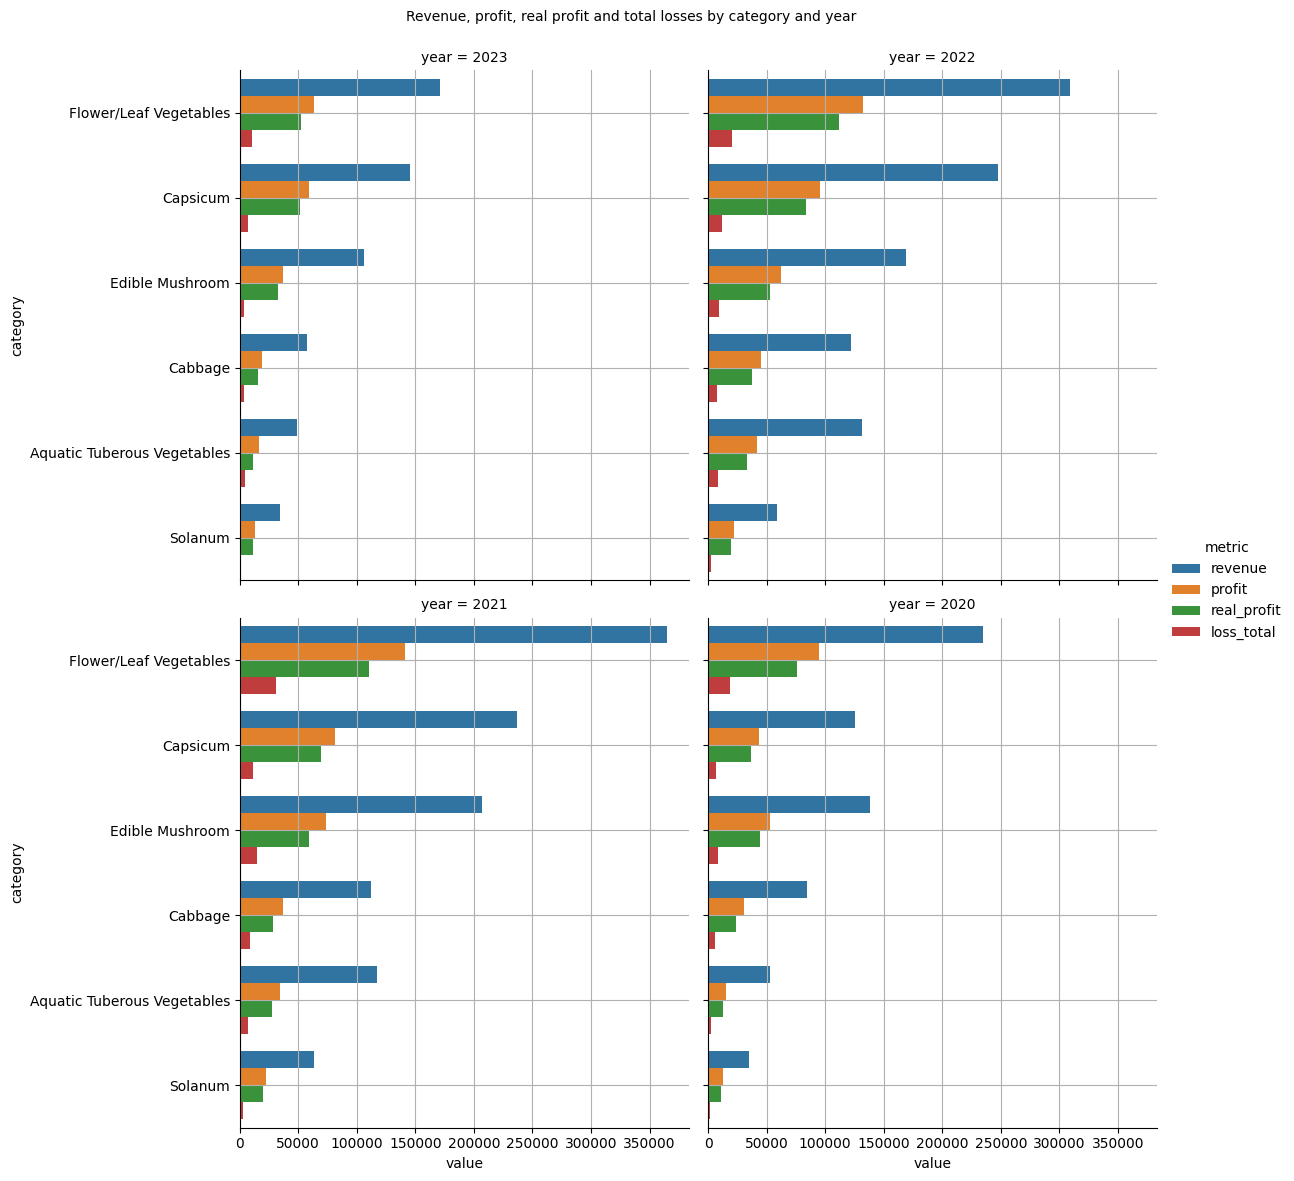

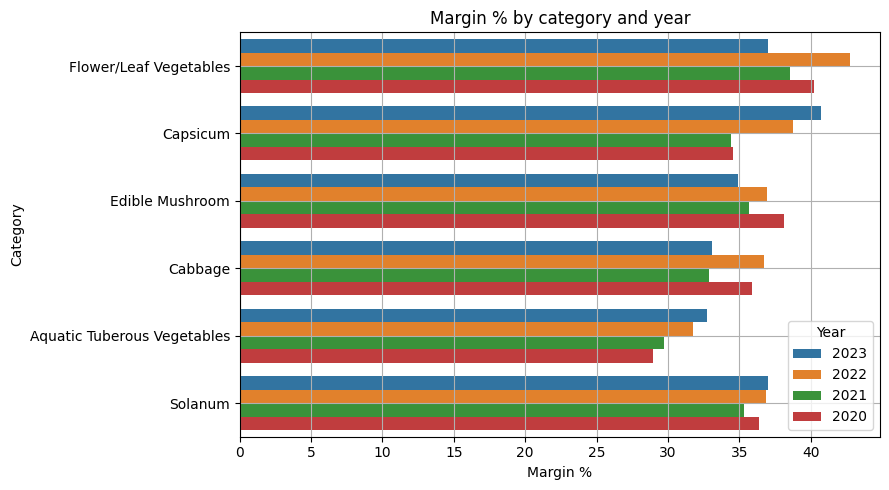

In [10]:
# 1. Revenue, profit, real profit, total losses by category and year
df_melted = df_2_1_profit_category.melt(
    id_vars=['category','year'],
    value_vars=['revenue', 'profit', 'real_profit', 'loss_total'],
    var_name='metric',
    value_name='value')

pr_cat=sns.catplot(data=df_melted, kind='bar', x='value', y='category', hue='metric', col='year',col_wrap=2, height=6, aspect=1)
pr_cat.fig.suptitle('Revenue, profit, real profit and total losses by category and year', fontsize=10)
for ax in pr_cat.axes.flatten():
    ax.grid(True)
pr_cat.fig.subplots_adjust(top=0.93)
plt.show()


# 2. Margin % by category and year

plt.figure(figsize=(9,5))
sns.barplot(data=df_2_1_profit_category, x='margin_percent', y='category', hue='year')
plt.title('Margin % by category and year')
plt.xlabel('Margin %')
plt.ylabel('Category')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
df_2_2_profit_month.head(1)

,month,revenue,profit,margin_percent,loss_returns,loss_spoilage,real_profit
0,2023-06,70103.42,24259.26,34.60%,4.49,4546.95,19707.82


In [12]:
df_2_2_profit_month['month_str'] = pd.to_datetime(df_2_2_profit_month['month']).dt.strftime('%Y-%m')
df_2_2_profit_month['loss_total'] = (df_2_2_profit_month['loss_returns'] + df_2_2_profit_month['loss_spoilage'])
df_2_2_profit_month['margin_percent'] = df_2_2_profit_month['margin_percent'].str.rstrip('%').astype(float)

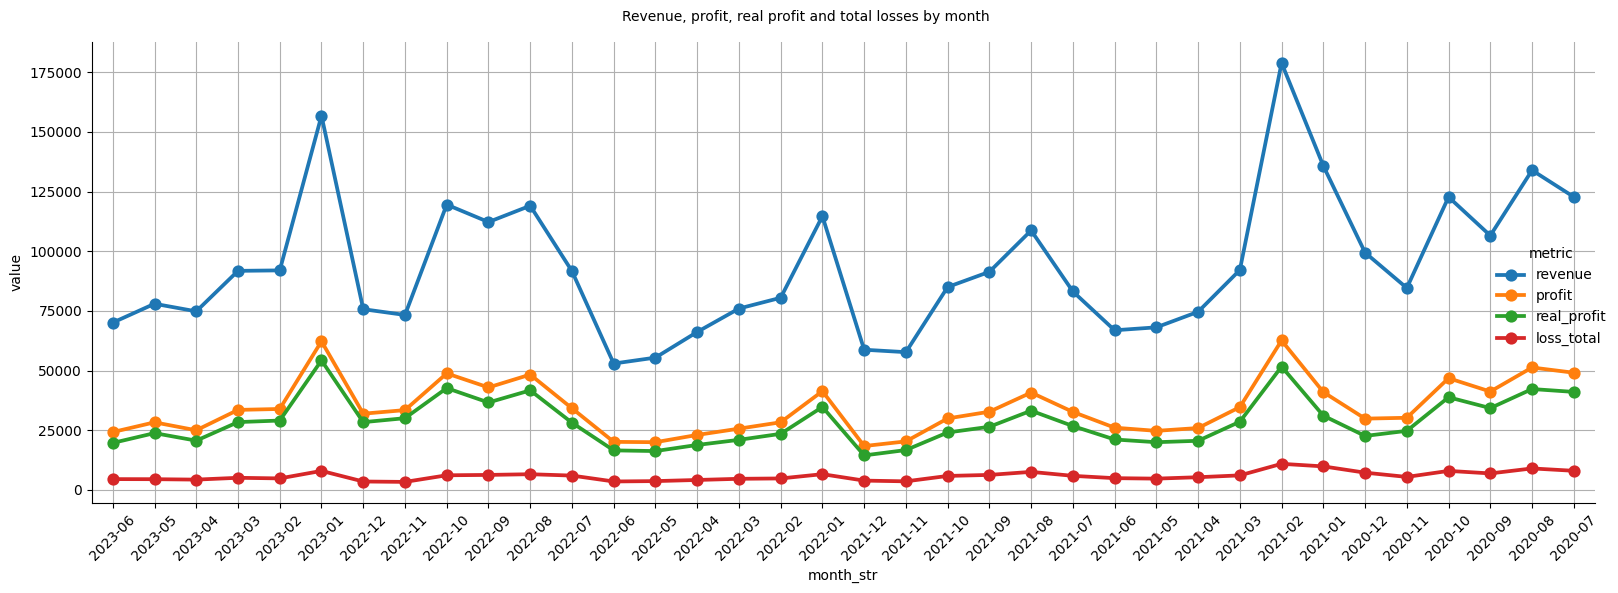

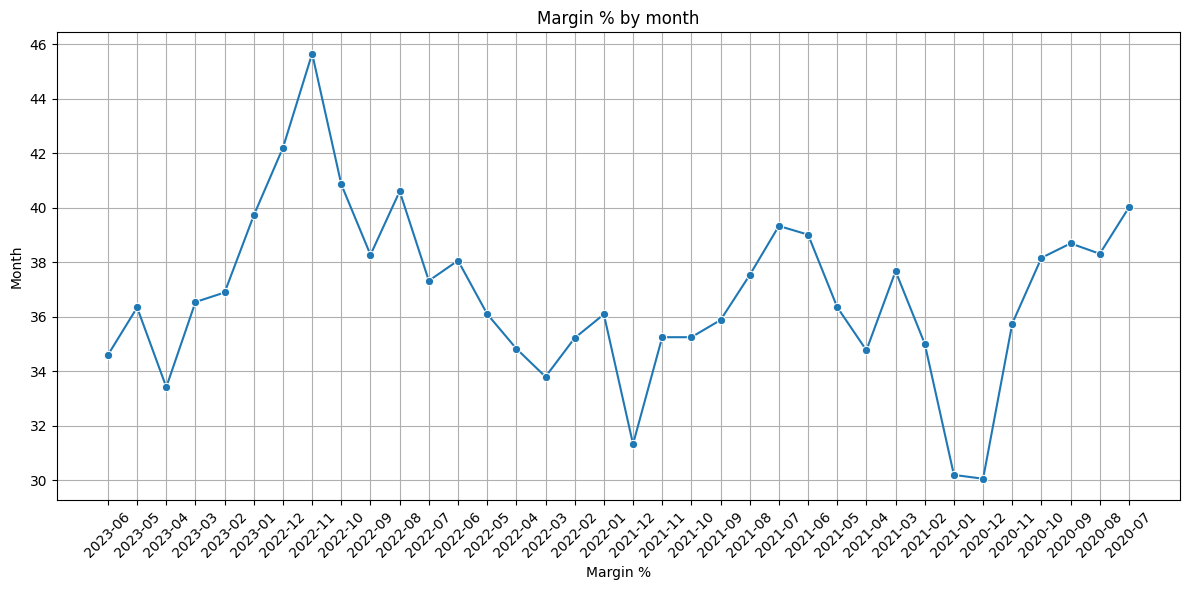

In [13]:
# 1. Revenue, profit, real profit, total losses by month

df_melted2 = df_2_2_profit_month.melt(
    id_vars=['month_str'],
    value_vars=['revenue', 'profit', 'real_profit', 'loss_total'],
    var_name='metric',
    value_name='value')

pr_m=sns.catplot(data=df_melted2, kind='point', x='month_str', y='value', hue='metric', height=6, aspect=2.5)
pr_m.fig.suptitle('Revenue, profit, real profit and total losses by month', fontsize=10)
pr_m.fig.subplots_adjust(top=1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Margin % by month

plt.figure(figsize=(12,6))
sns.lineplot(data= df_2_2_profit_month, x='month_str', y='margin_percent', marker='o')
plt.title('Margin % by month')
plt.xlabel('Margin %')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
df_3_1_discount_category.head(2)

,year,category,disc_sales_perc,avg_impact_quantity,avg_impact_revenue,avg_impact_profit,margin_diff,roi_discount
0,2023,Flower/Leaf Vegetables,8.73%,28.39%,-22.32%,-81.14%,-29.58%,-98.20%
1,2023,Aquatic Tuberous Vegetables,6.76%,-21.14%,-26.13%,-117.01%,-42.99%,-101.23%


In [15]:
df_3_1_discount_category['disc_sales_perc'] = df_3_1_discount_category['disc_sales_perc'].str.rstrip('%').astype(float)
df_3_1_discount_category['roi_discount'] = df_3_1_discount_category['roi_discount'].str.rstrip('%').astype(float)
df_3_1_discount_category['margin_diff'] = df_3_1_discount_category['margin_diff'].str.rstrip('%').astype(float)

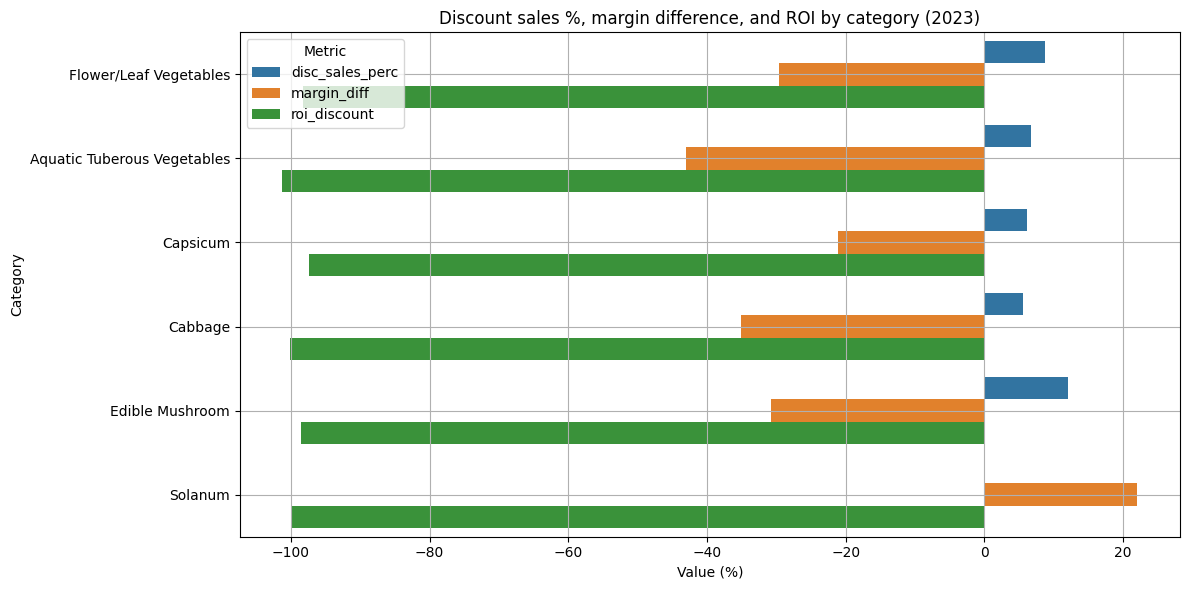

In [16]:
# 'Discount sales %, margin difference, and ROI by category (2023)

df_filter = df_3_1_discount_category[df_3_1_discount_category['year'] == '2023']
df_melted3 = df_filter.melt(
    id_vars='category',
    value_vars=['disc_sales_perc', 'margin_diff', 'roi_discount'],
    var_name='metric',
    value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted3, x='value', y='category', hue='metric')
plt.title('Discount sales %, margin difference, and ROI by category (2023)')
plt.xlabel('Value (%)')
plt.ylabel('Category')
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df_3_2_discount_month.head(1)

,month,disc_sales_perc,avg_impact_quantity,avg_impact_revenue,avg_impact_profit,margin_diff,roi_discount
0,2023-06,8.26%,36.92%,-21.19%,-85.96%,-30.08%,-98.74%


In [18]:
df_3_2_discount_month['month_str'] = pd.to_datetime(df_3_2_discount_month['month']).dt.strftime('%Y-%m')
df_3_2_discount_month['avg_impact_quantity'] = df_3_2_discount_month['avg_impact_quantity'].str.rstrip('%').astype(float)
df_3_2_discount_month['disc_sales_perc'] = df_3_2_discount_month['disc_sales_perc'].str.rstrip('%').astype(float)
df_3_2_discount_month['avg_impact_profit'] = df_3_2_discount_month['avg_impact_profit'].str.rstrip('%').astype(float)

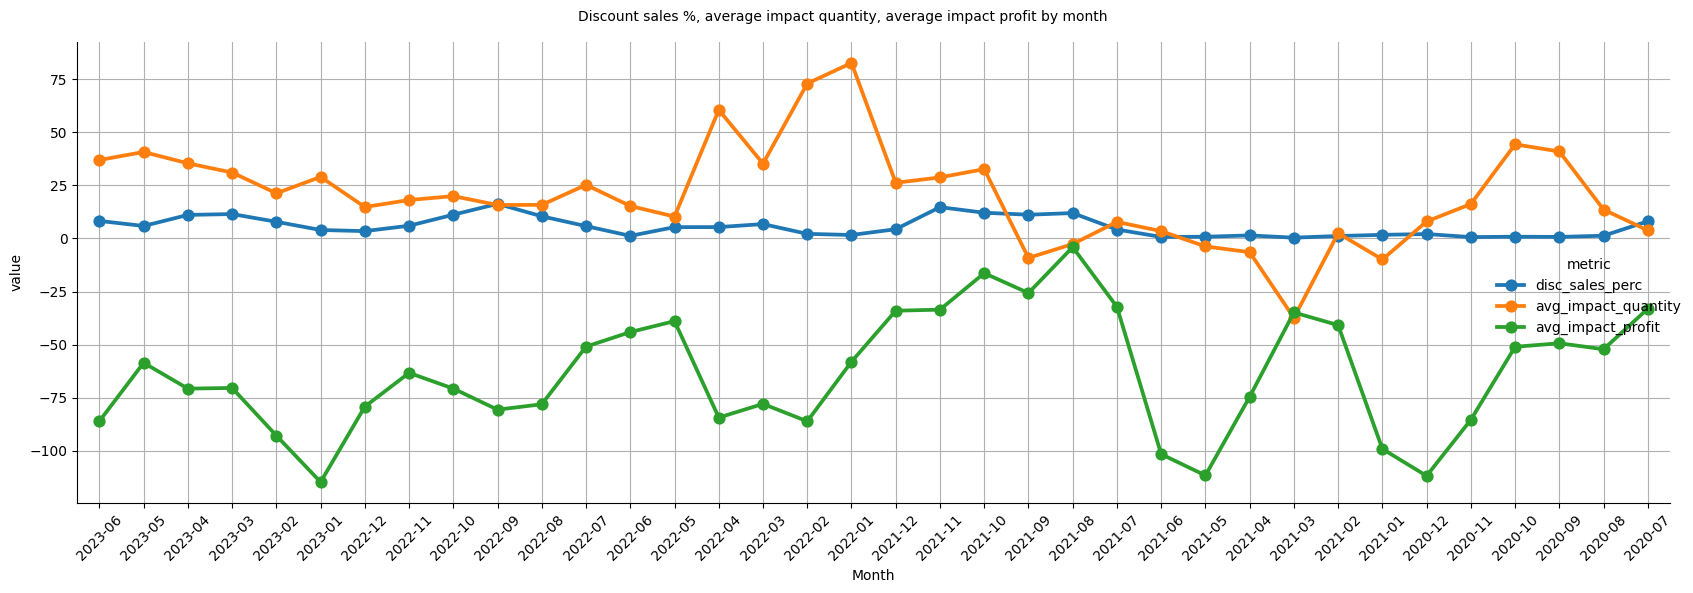

In [19]:
# Discount sales %, average impact quantity, and average impact profit by month

df_melted4 = df_3_2_discount_month.melt(
    id_vars=['month_str'],
    value_vars=['disc_sales_perc','avg_impact_quantity','avg_impact_profit'],
    var_name='metric',
    value_name='value')
df_melted4 = df_melted4.rename(columns={'month_str': 'Month'})

dsc_m=sns.catplot(data=df_melted4, kind='point', x='Month', y='value', hue='metric', height=6, aspect=2.5)
dsc_m.fig.suptitle('Discount sales %, average impact quantity, average impact profit by month', fontsize=10)
dsc_m.fig.subplots_adjust(top=1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
 df_4_1_top_bottom.head(2)

,year,category,top_rank,bottom_rank,name,sales_kg,revenue,profit,loss_returns,loss_spoilage,real_profit
0,2023,Aquatic Tuberous Vegetables,1,12,Net Lotus Root (1),2569.32,14490.57,5369.90,3.58,505.29,4861.03
1,2023,Aquatic Tuberous Vegetables,2,11,Honghu Lotus Root Powder (Fenou),1450.00,14988.90,4617.94,10.10,1224.81,3383.03


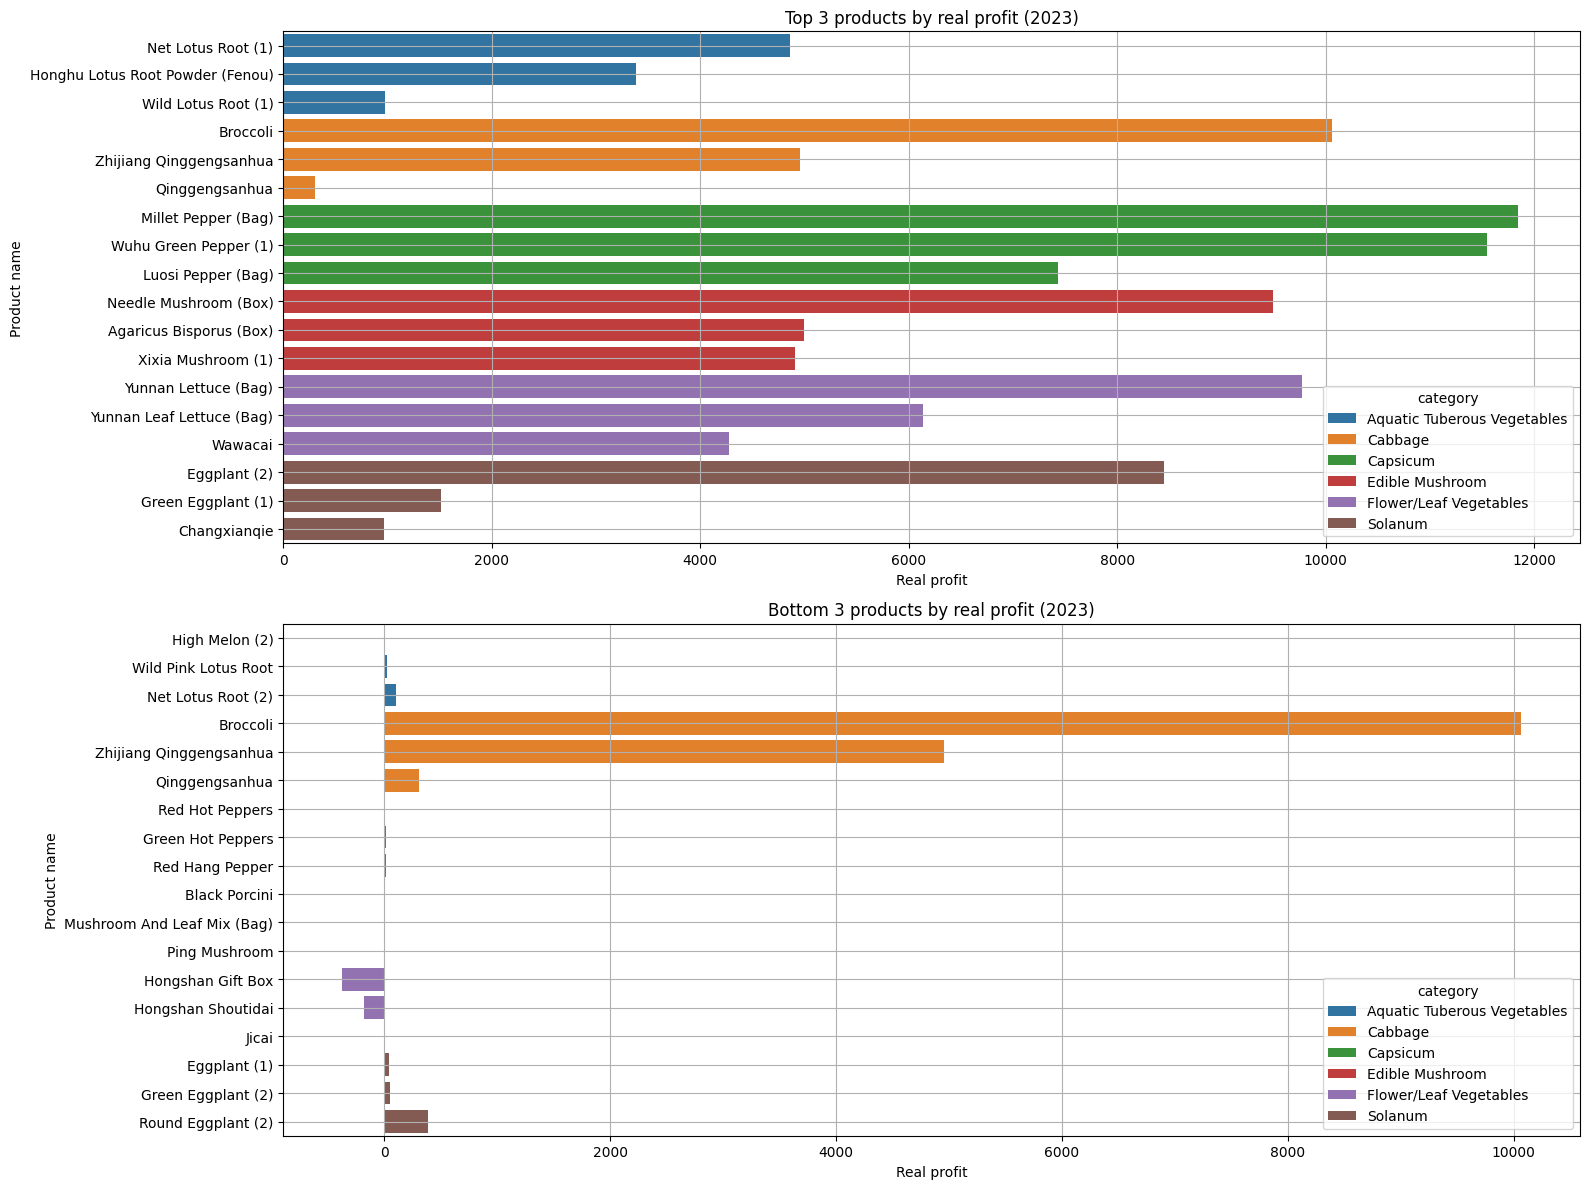

In [21]:
# 1. Top 3 products by real profit (2023)

df_filter2 = df_4_1_top_bottom[df_4_1_top_bottom['year'] == '2023']
top_items = df_filter2[df_filter2['top_rank'] <= 3].copy()

plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
sns.barplot(data=top_items, x='real_profit', y='name', hue='category')
plt.title('Top 3 products by real profit (2023)')
plt.xlabel('Real profit')
plt.ylabel('Product name')
plt.grid(True)
plt.tight_layout()

# 2. Bottom 3 products by real profit (2023)

bottom_items = df_filter2[df_filter2['bottom_rank'] <= 3].copy()
plt.subplot(2, 1, 2)
sns.barplot(data=bottom_items, x='real_profit', y='name', hue='category')
plt.title('Bottom 3 products by real profit (2023)')
plt.xlabel('Real profit')
plt.ylabel('Product name')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df_4_2_top_returns.head(3)

,year,category,rank,name,return_count,return_kg,loss_revenue,loss_profit
0,2023,Aquatic Tuberous Vegetables,1,Honghu Lotus Root Powder (Fenou),4,4.00,38.90,10.10
1,2023,Aquatic Tuberous Vegetables,2,High Melon (1),1,0.30,9.00,4.03
2,2023,Aquatic Tuberous Vegetables,3,Net Lotus Root (1),2,2.25,9.99,3.58


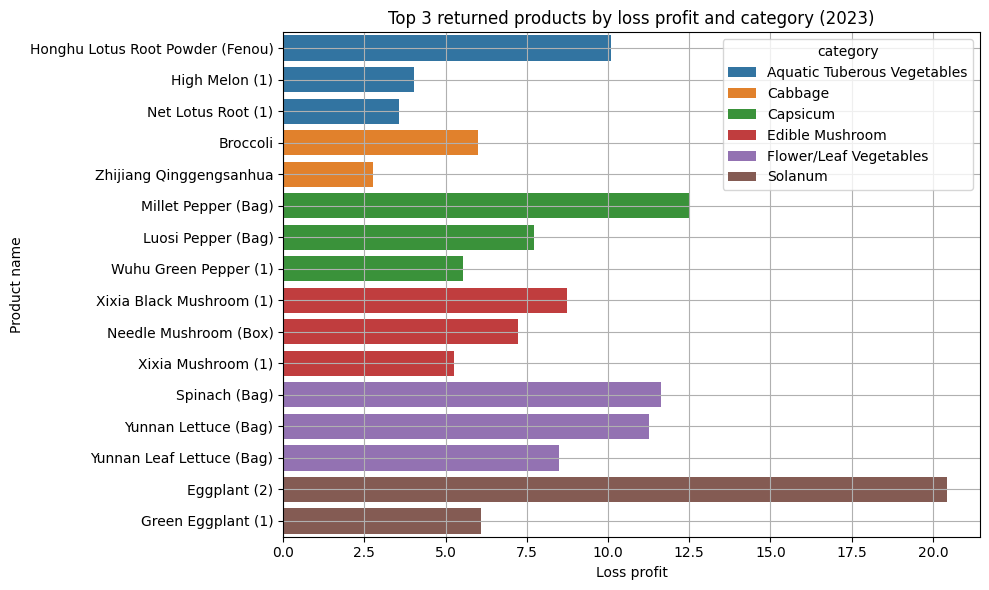

In [23]:
# Top 3 returned products by loss profit and category (2023)

df_filter3 = df_4_2_top_returns[df_4_2_top_returns['year'] == '2023']
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filter3, x='loss_profit', y='name', hue='category')
plt.title('Top 3 returned products by loss profit and category (2023)')
plt.xlabel('Loss profit')
plt.ylabel('Product name')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df_4_3_longtail_losses.head(3)

,quarter,category,name,sales_kg,revenue,profit,segment
0,2023 Q2,Flower/Leaf Vegetables,Sichuan Red Cedar,41.84,1178.38,398.30,Long_tail
1,2023 Q2,Flower/Leaf Vegetables,Yellow Xincai (1),0.40,1.82,-2.13,Negative_profit
2,2023 Q1,Aquatic Tuberous Vegetables,High Melon (1),68.29,1811.82,703.61,Long_tail


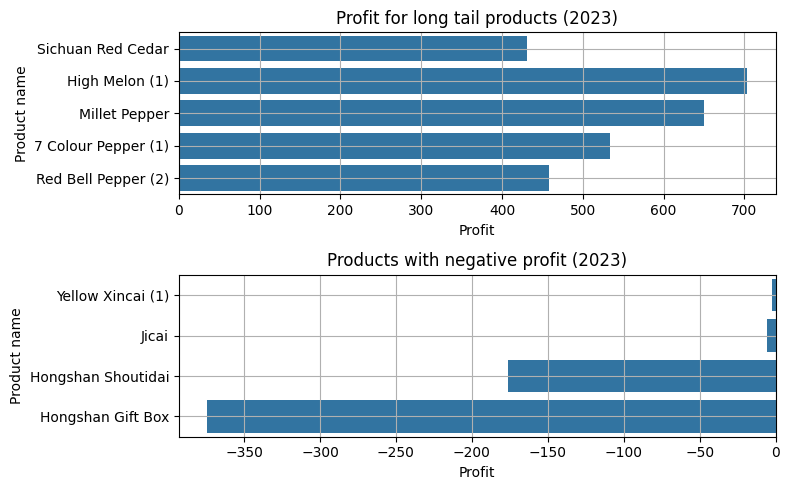

In [25]:
# 1. Profit for long tail products (2023)

plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
df_filter4 = df_4_3_longtail_losses[df_4_3_longtail_losses['quarter'].str.startswith('2023')]
df_long_tail = df_filter4[df_filter4['segment'] == 'Long_tail']

sns.barplot(data=df_long_tail, y='name', x='profit', errorbar=None)
plt.title('Profit for long tail products (2023)')
plt.xlabel('Profit') 
plt.ylabel('Product name')
plt.grid(True)

# 2. Products with negative profit (2023)
plt.subplot(2, 1, 2)
df_negative = df_filter4[df_filter4['segment'] == 'Negative_profit']

sns.barplot(data=df_negative, y='name', x='profit',errorbar=None)
plt.title('Products with negative profit (2023)')
plt.xlabel('Profit')
plt.ylabel('Product name')
plt.grid(True)
plt.tight_layout()
plt.show()